In [57]:
import requests
import pprint
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import plotly.express as px

from api_keys import greater_schools_api_key


In [3]:
#parameters of the search- for practice prior to adding in csv.

city = "atlanta"
state = 'ga'
value = 10
level = 'h' #Valid values: e, m,h
school_type = "private" # Valid values: "public", "charter", "private"
limit = 50 #max 50

headers = {
  'X-API-Key': greater_schools_api_key
}


In [4]:
zipcodes_school = []

#read in the zipcode 
with open('output-data/zipcodes.csv','r') as csv_file:
    zipcodes_csv = csv.reader(csv_file, delimiter=',')
    #loop through the zipcode csv and find the schools associated with that.
    line_count = 0
    for row in zipcodes_csv:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1

        else:
            print(row)
            zipcode = int(row[1])
            url = f'https://gs-api.greatschools.org/schools?zip={zipcode}&limit={limit}&value={value}level_codes={level}'
            response = requests.request("GET", url, headers=headers)
            schools = response.json()
            zipcodes_school.append(schools)
            #print(row[1])
            #print(schools)
            
            line_count += 1

        print(f'Processed {line_count} lines.')



Column names are Zipcode, Zipcode, City, State, Distance from Origin
Processed 1 lines.
['0', '30303', 'Atlanta', 'GA', '0.0']
Processed 2 lines.
['1', '30302', 'Atlanta', 'GA', '0.25']
Processed 3 lines.
['2', '30321', 'Atlanta', 'GA', '0.25']
Processed 4 lines.
['3', '30343', 'Atlanta', 'GA', '0.25']
Processed 5 lines.
['4', '30353', 'Atlanta', 'GA', '0.25']
Processed 6 lines.
['5', '30358', 'Atlanta', 'GA', '0.25']
Processed 7 lines.
['6', '30370', 'Atlanta', 'GA', '0.25']
Processed 8 lines.
['7', '30374', 'Atlanta', 'GA', '0.25']
Processed 9 lines.
['8', '30392', 'Atlanta', 'GA', '0.25']
Processed 10 lines.
['9', '30394', 'Atlanta', 'GA', '0.25']
Processed 11 lines.
['10', '30334', 'Atlanta', 'GA', '0.27']
Processed 12 lines.
['11', '31136', 'Atlanta', 'GA', '0.51']
Processed 13 lines.
['12', '30312', 'Atlanta', 'GA', '0.73']
Processed 14 lines.
['13', '30313', 'Atlanta', 'GA', '1.12']
Processed 15 lines.
['14', '30308', 'Atlanta', 'GA', '1.53']
Processed 16 lines.
['15', '30332', 

In [ ]:
#pprint.pprint(zipcodes_school)

In [5]:
zipcodes_school[0]
len(zipcodes_school)

schools_in_zipcode = []
for s in zipcodes_school:
    if s['schools']== []:
        pass
    else:
        schools_in_zipcode.append(s)

pprint.pprint(schools_in_zipcode)

[{'schools': [{'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 206,
               'district-name': 'Department Of Human Resources',
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.753963,
               'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'p,e,m,h',
               'lon': -84.390221,
               'name': 'Department Of Human Resources',
               'nces-id': '130002703682',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
               'phone': '(404) 657-0435',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture 

               'fipscounty': 13121,
               'lat': 33.748775,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.421616,
               'name': 'M. A. Jones Elementary School',
               'nces-id': '130012000085',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/74-M.-A.-Jones-Elementary-School/',
               'phone': '(404) 802-3900',
               'rating': '4',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10

               'school-summary': 'Kipp Strive Academy, a charter school '
                                 'located in Atlanta, GA, serves grades 5-8 in '
                                 'the Atlanta Public Schools.It has received a '
                                 'GreatSchools Rating of 7 out of 10, based on '
                                 'a variety of school quality measures.',
               'state': 'GA',
               'state-id': '7610115',
               'street': '1444 Lucile Avenue Southwest',
               'type': 'charter',
               'universal-id': '1306441',
               'web-site': 'http://www.kippmetroatlanta.org/KIPP-STRIVE-Academy',
               'year': 2022,
               'zip': '30310'},
              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.711781,
               'level': 'KG'

               'level-codes': 'p,e,m',
               'lon': -84.376015,
               'name': "The Children's School",
               'nces-id': 'AA000273',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2297-The-Childrens-School/',
               'phone': '(404) 873-6985',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                

                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'The Atlanta School, a private school located '
                                 'in Atlanta, GA, serves grades PK-8 in the .',
               'state': 'GA',
               'state-id': None,
               'street': '1015 Edgewood Avenue Northeast',
               'type': 'private',
               'universal-id': '1302273',
               'web-site': 'http://theatlantaschool.com/',
               'year': None,
               'zip': '30307'},
              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name':

               'zip': '30315'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 624-9093',
               'fipscounty': 13121,
               'lat': 33.735703,
               'level': 'KG,1,2,3,4,5',
               'level-codes': 'e',
               'lon': -84.376099,
               'name': 'Neighborhood Charter School',
               'nces-id': '130012002615',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2651-Neighborhood-Charter-School/',
               'phone': '(404) 624-6226',
               'rating': '7',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful pict

                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection 

 {'schools': [{'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 0,
               'district-name': None,
               'fax': '(404) 377-0884',
               'fipscounty': 13121,
               'lat': 33.787216,
               'level': 'KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'e,m,h',
               'lon': -84.417351,
               'name': 'The Howard School',
               'nces-id': '00298398',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/1961-The-Howard-School/',
               'phone': '(404) 377-7436',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'eff

                                     'part of the school selection process.',
               'school-summary': 'Douglass High School, a public school '
                                 'located in Atlanta, GA, serves grades 9-12 '
                                 'in the Atlanta Public Schools.It has '
                                 'received a GreatSchools Rating of 2 out of '
                                 '10, based on a variety of school quality '
                                 'measures.',
               'state': 'GA',
               'state-id': '7614058',
               'street': '225 Hamilton E Holmes Drive Northwest',
               'type': 'public',
               'universal-id': '1300075',
               'web-site': None,
               'year': 2022,
               'zip': '30318'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(

               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school perfor

               'state': 'GA',
               'state-id': None,
               'street': '2295 Benjamin E Mays Dr SW',
               'type': 'private',
               'universal-id': '1306602',
               'web-site': 'http://www.theblackstar.org/index.html',
               'year': None,
               'zip': '30311'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 4,
               'district-name': 'Atlanta Public Schools',
               'fax': '(404) 752-0798',
               'fipscounty': 13121,
               'lat': 33.717186,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.465462,
               'name': 'Cascade Elementary School',
               'nces-id': '130012000092',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/78-Cascade-Elementary-School/',
               'phone': '(404) 802-8100',
               'rating': '1',
           

               'level-codes': 'e,m',
               'lon': -84.430901,
               'name': 'Kipp South Fulton Academy School',
               'nces-id': '130228002885',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/3050-Kipp-South-Fulton-Academy-School/',
               'phone': '(678) 278-0160',
               'rating': '9',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
        

               'street': '2580 Delowe Drive',
               'type': 'public',
               'universal-id': '1300978',
               'web-site': 'http://school.fultonschools.org/es/conleyhills/Pages/default.aspx',
               'year': 2022,
               'zip': '30344'},
              {'city': 'East Point',
               'county': 'Fulton County',
               'district-id': 73,
               'district-name': 'Fulton County School District',
               'fax': '(404) 669-8079',
               'fipscounty': 13121,
               'lat': 33.678413,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.42495,
               'name': 'Parklane Elementary School',
               'nces-id': '130228000988',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/994-Parklane-Elementary-School/',
               'phone': '(470) 254-8070',
               'rating': '3',
               'rating-description': 'The Gr

               'phone': '(404) 377-1315',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider o

               'universal-id': '1309016',
               'web-site': None,
               'year': None,
               'zip': '30030'},
              {'city': 'Decatur',
               'county': 'Dekalb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.773762,
               'level': 'KG,1,2,3,4,5,6,7,8',
               'level-codes': 'e,m',
               'lon': -84.305664,
               'name': 'St Thomas More Catholic School',
               'nces-id': 'BB200595',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/9118-St-Thomas-More-Catholic-School/',
               'phone': '(404) 373-8456',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school qua

               'name': 'Ben Franklin Academy',
               'nces-id': 'A9303095',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2157-Ben-Franklin-Academy/',
               'phone': '(404) 633-7404',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                           

               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school perfor

               'level-codes': 'p,e',
               'lon': -84.252251,
               'name': '4 Ever Learning Academy',
               'nces-id': 'BB080565',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/6214-4-Ever-Learning-Academy/',
               'phone': '(404) 289-9882',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                             

               'state-id': '6443069',
               'street': '2701 Oakland Terrace',
               'type': 'public',
               'universal-id': '1300763',
               'web-site': 'http://www.toneyes.dekalb.k12.ga.us/',
               'year': 2022,
               'zip': '30032'},
              {'city': 'Decatur',
               'county': 'Dekalb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.735718,
               'level': 'KG,1,2,3,4,5,6,7,8',
               'level-codes': 'e,m',
               'lon': -84.253357,
               'name': 'Kilombo Academic & Cult. Inst.',
               'nces-id': 'A1501343',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/8940-Kilombo-Academic--Cult.-Inst./',
               'phone': '(404) 284-0048',
               'rating': None,
               'rating-description': 'The GreatSchools Rating help

               'phone': '(404) 636-7951',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider o

               'zip': '30033'}]},
 {'schools': [{'city': 'Avondale Estates',
               'county': 'Dekalb County',
               'district-id': 55,
               'district-name': 'Dekalb County School District',
               'fax': '(678) 676-2510',
               'fipscounty': 13089,
               'lat': 33.759178,
               'level': '8,9,10,11,12',
               'level-codes': 'm,h',
               'lon': -84.266724,
               'name': 'Dekalb School Of The Arts',
               'nces-id': '130174003884',
               'overview-url': 'https://www.greatschools.org/georgia/avondale-estates/6486-Dekalb-School-Of-The-Arts/',
               'phone': '(678) 676-2502',
               'rating': '8',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'a

               'phone': '(404) 252-3910',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider o

               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.692966,
               'level': 'PK,TK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'p,e,m,h',
               'lon': -84.516037,
               'name': 'Southwest Atlanta Christian Academy',
               'nces-id': 'A9300322',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/2138-Southwest-Atlanta-Christian-Academy/',
               'phone': '(404) 346-2080',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
       

                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'OMNI International School, a private school '
                                 'located in Atlanta, GA, serves grades PK-5 '
                                 'in the .',
               'state': 'GA',
               'state-id': None,
               'street': '3940 Cascade Road',
               'type': 'private',
               'universal-id': '1306901',
               'web-site': 'www.omnischoolatl.com',
               'year': None,
               'zip': '30331'},
              {'city': 'Atlanta',
               'county': 'Fulton',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.772495,
               'level': 'KG,1,2,3,4,5',
               'level-codes': 'e',
               'lon': -84.498

                                 'grades PK-5 in the Atlanta Public Schools.It '
                                 'has received a GreatSchools Rating of 3 out '
                                 'of 10, based on a variety of school quality '
                                 'measures.',
               'state': 'GA',
               'state-id': '7613057',
               'street': '3181 Hogan Road Southwest',
               'type': 'public',
               'universal-id': '1300091',
               'web-site': 'http://www.apskids.org/continentalcolony/',
               'year': 2022,
               'zip': '30331'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 73,
               'district-name': 'Fulton County School District',
               'fax': '(404) 346-6526',
               'fipscounty': 13121,
               'lat': 33.70422,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon'

                                 'charter school located in Atlanta, GA, '
                                 'serves grades 5-8 in the Dekalb County '
                                 'School District.It has received a '
                                 'GreatSchools Rating of 7 out of 10, based on '
                                 'a variety of school quality measures.',
               'state': 'GA',
               'state-id': '6440705',
               'street': '3007 Hermance Drive',
               'type': 'charter',
               'universal-id': '1303634',
               'web-site': None,
               'year': 2022,
               'zip': '30319'},
              {'city': 'Brookhaven',
               'county': 'DeKalb County',
               'district-id': 55,
               'district-name': 'Dekalb County School District',
               'fax': '(678) 874-7810',
               'fipscounty': 13089,
               'lat': 33.841328,
               'level': 'PK,KG,1,2,3,4,5',
         

                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
                                     'and can include test scores, college '
                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider famil

               'lat': 33.666862,
               'level': 'PK,KG,1,2,3,4,5',
               'level-codes': 'p,e',
               'lon': -84.226479,
               'name': 'Narvie Harris Elementary School',
               'nces-id': '130174002308',
               'overview-url': 'https://www.greatschools.org/georgia/decatur/2413-Narvie-Harris-Elementary-School/',
               'phone': '(678) 676-9202',
               'rating': '7',
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively each school serves all of '
                                     'its students. Ratings are on a scale of '
                                     '1 (below average) to 10 (above average) '
           

 {'schools': [{'city': 'Atlanta',
               'county': 'Dekalb County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13089,
               'lat': 33.864414,
               'level': '9,10,11,12',
               'level-codes': 'h',
               'lon': -84.291489,
               'name': 'St Pius X Catholic High School',
               'nces-id': '00295932',
               'overview-url': 'https://www.greatschools.org/georgia/atlanta/1849-St-Pius-X-Catholic-High-School/',
               'phone': '(404) 636-3023',
               'rating': None,
               'rating-description': 'The GreatSchools Rating helps parents '
                                     'compare schools within a state based on '
                                     'a variety of school quality indicators '
                                     'and provides a helpful picture of how '
                                     'effectively 

                                 'located in Atlanta, GA, serves grades 6-8 in '
                                 'the Fulton County School District.It has '
                                 'received a GreatSchools Rating of 4 out of '
                                 '10, based on a variety of school quality '
                                 'measures.',
               'state': 'GA',
               'state-id': '6600286',
               'street': '5340 S Trimble Rd',
               'type': 'public',
               'universal-id': '1301020',
               'web-site': None,
               'year': 2022,
               'zip': '30342'},
              {'city': 'Atlanta',
               'county': 'Fulton County',
               'district-id': 0,
               'district-name': None,
               'fax': None,
               'fipscounty': 13121,
               'lat': 33.895885,
               'level': 'PK,TK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
               'level-codes': 'p,e,m,h',
         

                                     'readiness, academic progress, advanced '
                                     'courses, equity, discipline and '
                                     'attendance data. We also advise parents '
                                     'to visit schools, consider other '
                                     'information on school performance and '
                                     'programs, and consider family needs as '
                                     'part of the school selection process.',
               'school-summary': 'Heards Ferry Elementary School, a public '
                                 'school located in Atlanta, GA, serves grades '
                                 'PK-5 in the Fulton County School District.It '
                                 'has received a GreatSchools Rating of 8 out '
                                 'of 10, based on a variety of school quality '
                                 'measures.',
               '

In [6]:
#loop through the dictionaries and lists to get to the specific values.
specific_schools = []

for schools in schools_in_zipcode:
    for key,value in schools.items():
        for s in value:
            specific_schools.append(s)

pprint.pprint(specific_schools)


[{'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 206,
  'district-name': 'Department Of Human Resources',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.753963,
  'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
  'level-codes': 'p,e,m,h',
  'lon': -84.390221,
  'name': 'Department Of Human Resources',
  'nces-id': '130002703682',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6754-Department-Of-Human-Resources/',
  'phone': '(404) 657-0435',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'read

  'state': 'GA',
  'state-id': '7615558',
  'street': '500 Whitehall Terrace Southwest',
  'type': 'public',
  'universal-id': '1300052',
  'web-site': 'http://www.apskids.org/dunbar/',
  'year': 2022,
  'zip': '30312'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 0,
  'district-name': None,
  'fax': '(404) 577-0302',
  'fipscounty': 13121,
  'lat': 33.739868,
  'level': 'KG,1,2,3,4,5,6,7,8',
  'level-codes': 'e,m',
  'lon': -84.373962,
  'name': 'St Nicholas Orthodox Academy',
  'nces-id': 'A0700765',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6277-St-Nicholas-Orthodox-Academy/',
  'phone': '(404) 588-6088',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
      

  'type': 'private',
  'universal-id': '1308900',
  'web-site': None,
  'year': None,
  'zip': '30308'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 475-1946',
  'fipscounty': 13121,
  'lat': 33.764664,
  'level': '5,6,7,8',
  'level-codes': 'e,m',
  'lon': -84.422768,
  'name': 'Kipp West Atlanta Young Scholars Academy',
  'nces-id': '130012003031',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/3025-Kipp-West-Atlanta-Young-Scholars-Academy/',
  'phone': '(404) 475-1941',
  'rating': '5',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
         

  'zip': '30314'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.766655,
  'level': 'KG',
  'level-codes': 'e',
  'lon': -84.448647,
  'name': 'KIPP Soul Primary',
  'nces-id': '130012004315',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8845-KIPP-Soul-Primary/',
  'phone': '(404) 759-6852',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
    

                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Finch Elementary School, a public school located in '
                    'Atlanta, GA, serves grades PK-5 in the Atlanta Public '
                    'Schools.It has received a GreatSchools Rating of 2 out of '
                    '10, based on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7610105',
  'street': '1114 Avon Avenue Southwest',
  'type': 'public',
  'universal-id': '1303641',
  'web-site': None,
  'year': 2022,
  'zip': '30310'},
 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': No

  'fipscounty': 13121,
  'lat': 33.698097,
  'level': 'PK,KG,1,2,3,4,5',
  'level-codes': 'p,e',
  'lon': -84.413399,
  'name': 'Perkerson Elementary School',
  'nces-id': '130012000122',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/98-Perkerson-Elementary-School/',
  'phone': '(404) 802-3950',
  'rating': '2',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to vis

                        'process.',
  'school-summary': 'Midtown High School, a public school located in Atlanta, '
                    'GA, serves grades 9-12 in the Atlanta Public Schools.It '
                    'has received a GreatSchools Rating of 7 out of 10, based '
                    'on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7614560',
  'street': '929 Charles Allen Drive Northeast',
  'type': 'public',
  'universal-id': '1300061',
  'web-site': 'http://www.gradyhighschool.org/',
  'year': 2022,
  'zip': '30309'},
 {'city': 'Atlanta',
  'county': 'DeKalb',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.78413,
  'level': 'PK,KG',
  'level-codes': 'p,e',
  'lon': -84.38958,
  'name': 'The Goddard School - Atlanta (Midtown)',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8684-The-Goddard-School---Atlanta-Midtown/',
  'phone': '(404) 541-1936',
  'rating': None,
 

  'type': 'private',
  'universal-id': '1302273',
  'web-site': 'http://theatlantaschool.com/',
  'year': None,
  'zip': '30307'},
 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.756809,
  'level': '9,10,11,12',
  'level-codes': 'h',
  'lon': -84.354485,
  'name': 'The New School',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6957-The-New-School/',
  'phone': '(404) 500-9753',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
  

                        'process.',
  'school-summary': 'Nur Academy, a private school located in Atlanta, GA, '
                    'serves grades PK-5 in the .',
  'state': 'GA',
  'state-id': None,
  'street': 'P.O. Box 12646',
  'type': 'private',
  'universal-id': '1302378',
  'web-site': None,
  'year': None,
  'zip': '30315'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 624-9093',
  'fipscounty': 13121,
  'lat': 33.735703,
  'level': 'KG,1,2,3,4,5',
  'level-codes': 'e',
  'lon': -84.376099,
  'name': 'Neighborhood Charter School',
  'nces-id': '130012002615',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/2651-Neighborhood-Charter-School/',
  'phone': '(404) 624-6226',
  'rating': '7',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicato

                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Barack and Michelle Obama Academy, a public school '
                    'located in Atlanta, GA, serves grades PK-5 in the Atlanta '
                    'Public Schools.It has received a GreatSchools Rating of 2 '
                    'out of 10, based on a variety of school quality measures.',
  'state': 'GA',
  'state-id': '7615066',
  'street': '970 Martin Street Southeast',
  'type': 'public',


  'fipscounty': 13121,
  'lat': 33.732525,
  'level': '6,7,8',
  'level-codes': 'm',
  'lon': -84.35511,
  'name': 'Atlanta Charter Middle School',
  'nces-id': '130012003541',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/3703-Atlanta-Charter-Middle-School/',
  'phone': '(678) 904-0051',
  'rating': '6',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit scho

 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 267,
  'district-name': 'Genesis Innovation Academy for Boys',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.715923,
  'level': 'KG,1,2,3,4,5,6,7',
  'level-codes': 'e,m',
  'lon': -84.35466,
  'name': 'Genesis Innovation Academy for Boys',
  'nces-id': '130024804288',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8775-Genesis-Innovation-Academy-For-Boys/',
  'phone': '(404) 944-8560',
  'rating': '6',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readines

                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Mother Hubbard Day Care & Kindergarten, a private school '
                    'located in Atlanta, GA, serves grades PK-K in the .',
  'state': 'GA',
  'state-id': None,
  'street': '2392 Donald L Hollowll Pkwy Nw',
  'type': 'private',
  'universal-id': '1304273',
  'web-site': None,
  'year': None,
  'zip': '30318'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 4,
  'district-name': 'Atlanta Public Schools',
  'fax': '(404) 792-5736',
  'fipscounty'

                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Crim High School, a public school located in Atlanta, GA, '
                    'serves grades 9-12 in the Atlanta Public Schools.',
  'state': 'GA',
  'state-id': '7612664',
  'street': '256 Clifton Street Southeast',
  'type': 'public',
  'universal-id': '1300096',
  'web-site': None,
  'year': None,
  'zip': '30317'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.80143,
  'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10',
  'level-codes': 'p,e,m,h',
  'lon': -84.3

  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.720215,
  'level': 'PK,KG,1',
  'level-codes': 'p,e',
  'lon': -84.467155,
  'name': 'Hillside Learning Center',
  'nces-id': 'K9301816',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/3984-Hillside-Learning-Center/',
  'phone': '(404) 755-2315',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                     

  'year': 2022,
  'zip': '30344'},
 {'city': 'East Point',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.675228,
  'level': 'PK,KG,1,2,3,4,5,6,7,8,9,10,11,12',
  'level-codes': 'p,e,m,h',
  'lon': -84.444496,
  'name': 'Pathway Christian School',
  'nces-id': '00298048',
  'overview-url': 'https://www.greatschools.org/georgia/east-point/1948-Pathway-Christian-School/',
  'phone': '(404) 763-3216',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, ac

  'name': 'Hamilton E. Holmes Elementary School',
  'nces-id': '130228002887',
  'overview-url': 'https://www.greatschools.org/georgia/east-point/3052-Hamilton-E.-Holmes-Elementary-School/',
  'phone': '(470) 254-3092',
  'rating': '4',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and pro

  'universal-id': '1308698',
  'web-site': None,
  'year': 2022,
  'zip': '30344'},
 {'city': 'East Point',
  'county': 'Fulton County',
  'district-id': 73,
  'district-name': 'Fulton County School District',
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.676121,
  'level': 'KG,1,2,3,4',
  'level-codes': 'e',
  'lon': -84.474068,
  'name': 'Latin Academy Grammar',
  'nces-id': '130228004218',
  'overview-url': 'https://www.greatschools.org/georgia/east-point/8766-Latin-Academy-Grammar/',
  'phone': '(404) 669-8060',
  'rating': '3',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test sco

  'overview-url': 'https://www.greatschools.org/georgia/decatur/1848-St.-Thomas-More-School/',
  'phone': '(404) 373-8456',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
 

  'phone': '(404) 370-4490',
  'rating': '8',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Winnona Park Elementary School, a public

  'zip': '30354'},
 {'city': 'Hapeville',
  'county': 'Clayton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13063,
  'lat': 33.637798,
  'level': '6,7,8,9,10,11,12',
  'level-codes': 'm,h',
  'lon': -84.390297,
  'name': 'Assisted Learning Centers',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/hapeville/3829-Assisted-Learning-Centers/',
  'phone': '(404) 567-4081',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
    

                        'process.',
  'school-summary': 'Margaret Harris Comprehensive School, a public school '
                    'located in Atlanta, GA, serves grades PK-12 in the Dekalb '
                    'County School District.',
  'state': 'GA',
  'state-id': '6440510',
  'street': '1634 Knob Hill Drive Northeast',
  'type': 'public',
  'universal-id': '1306594',
  'web-site': 'http://www.dekalb.k12.ga.us/margaretharris/',
  'year': None,
  'zip': '30329'},
 {'city': 'Atlanta',
  'county': 'DeKalb',
  'district-id': 0,
  'district-name': None,
  'fax': '(404) 633-6018',
  'fipscounty': 13089,
  'lat': 33.828392,
  'level': 'PK,KG,1,2,3,4,5,6',
  'level-codes': 'p,e',
  'lon': -84.308289,
  'name': 'Annunciation Day School',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/6656-Annunciation-Day-School/',
  'phone': '(404) 565-2850',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
           

  'fipscounty': 13089,
  'lat': 33.743614,
  'level': '4,5,6',
  'level-codes': 'e',
  'lon': -84.266029,
  'name': 'Wadsworth Magnet School For High Achievers',
  'nces-id': '130174003750',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/6362-Wadsworth-Magnet-School-For-High-Achievers/',
  'phone': '(678) 874-2402',
  'rating': '9',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'a

                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Montessori School At Emory, a private school located in '
                    'Decatur, GA, serves grades Ungraded in the .',
  'state': 'GA',
  'state-id': None,
  'street': '3021 North Decatur Road',
  'type': 'private',
  'universal-id': '1302257',
  'web-site': 'http://www.montessorischoolatemory.com',
  'year': None,
  'zip': '30033'},
 {'city': 'Decatur',
  'county': 'Dekalb County',
  'distr

  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-1302',
  'fipscounty': 13089,
  'lat': 33.778904,
  'level': 'KG,1,2,3,4,5,6,7',
  'level-codes': 'e,m',
  'lon': -84.260635,
  'name': 'Dekalb Elementary School Of The Arts',
  'nces-id': '130174000656',
  'overview-url': 'https://www.greatschools.org/georgia/avondale-estates/715-Dekalb-Elementary-School-Of-The-Arts/',
  'phone': '(678) 874-1302',
  'rating': '8',
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
             

  'state': 'GA',
  'state-id': None,
  'street': '3098 Saint Annes Lane Northwest',
  'type': 'private',
  'universal-id': '1302930',
  'web-site': 'www.saintannesdayschool.com',
  'year': None,
  'zip': '30327'},
 {'city': 'Atlanta',
  'county': 'Fulton County',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.842667,
  'level': '6,7,8,9,10,11,12',
  'level-codes': 'm,h',
  'lon': -84.42424,
  'name': 'Atlanta Girls School',
  'nces-id': 'A0102860',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/2939-Atlanta-Girls-School/',
  'phone': '(404) 845-0900',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a sc

  'nces-id': 'A0301265',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/3973-Seeds-Of-Faith-Christian-Academy/',
  'phone': '(404) 344-3985',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs 

  'county': 'COBB',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13067,
  'lat': 33.698566,
  'level': 'PK,TK,KG,1,2',
  'level-codes': 'p,e',
  'lon': -84.54319,
  'name': 'Atlanta Trilingual Academy',
  'nces-id': 'A1501223',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8875-Atlanta-Trilingual-Academy/',
  'phone': '(404) 647-4995',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and 

  'school-summary': 'Ashford Park Elementary School, a public school located '
                    'in Atlanta, GA, serves grades PK-5 in the Dekalb County '
                    'School District.It has received a GreatSchools Rating of '
                    '6 out of 10, based on a variety of school quality '
                    'measures.',
  'state': 'GA',
  'state-id': '6443050',
  'street': '2968 Cravenridge Drive Northeast',
  'type': 'public',
  'universal-id': '1300778',
  'web-site': 'http://www.dekalb.k12.ga.us/ashfordpark/',
  'year': 2022,
  'zip': '30319'},
 {'city': 'Brookhaven',
  'county': 'DeKalb County',
  'district-id': 55,
  'district-name': 'Dekalb County School District',
  'fax': '(678) 874-6610',
  'fipscounty': 13089,
  'lat': 33.915291,
  'level': '4,5,6',
  'level-codes': 'e',
  'lon': -84.320198,
  'name': 'Kittredge Magnet School',
  'nces-id': '130174001999',
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/800-Kittredge-Magnet-School/',
  'p

  'county': 'DeKalb',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13089,
  'lat': 33.707565,
  'level': 'PK,KG,1,2',
  'level-codes': 'p,e',
  'lon': -84.220863,
  'name': 'Love Thy Children Child Care',
  'nces-id': 'A9501497',
  'overview-url': 'https://www.greatschools.org/georgia/decatur/2335-Love-Thy-Children-Child-Care/',
  'phone': '(404) 288-2350',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline 

  'phone': '(404) 315-0305',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(above average) and can include test scores, college '
                        'readiness, academic progress, advanced courses, '
                        'equity, discipline and attendance data. We also '
                        'advise parents to visit schools, consider other '
                        'information on school performance and programs, and '
                        'consider family needs as part of the school selection '
                        'process.',
  'school-summary': 'Lullwater School, a private school loca

  'state-id': None,
  'street': '4669 Roswell Road',
  'type': 'private',
  'universal-id': '1304338',
  'web-site': None,
  'year': None,
  'zip': '30342'},
 {'city': 'Atlanta',
  'county': 'Fulton',
  'district-id': 0,
  'district-name': None,
  'fax': None,
  'fipscounty': 13121,
  'lat': 33.867607,
  'level': 'PK,KG',
  'level-codes': 'p,e',
  'lon': -84.381737,
  'name': 'Cambridge International School',
  'nces-id': None,
  'overview-url': 'https://www.greatschools.org/georgia/atlanta/8197-Cambridge-International-School/',
  'phone': '(678) 705-9091',
  'rating': None,
  'rating-description': 'The GreatSchools Rating helps parents compare schools '
                        'within a state based on a variety of school quality '
                        'indicators and provides a helpful picture of how '
                        'effectively each school serves all of its students. '
                        'Ratings are on a scale of 1 (below average) to 10 '
                        '(

In [7]:
zipcode_schools_df = pd.DataFrame(specific_schools)
zipcode_schools_df.head()

,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,city,...,county,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description
0,1306754,130002703682,8920198,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,Atlanta,...,Fulton County,33.753963,-84.390221,Department Of Human Resources,206,http://www.dhr.state.ga.us,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...
1,1306933,130023104095,78201190119,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,...,Fulton,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...
2,1308742,130228004261,6601321,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,...,Fulton County,33.754742,-84.385574,Fulton County School District,73,None,https://www.greatschools.org/georgia/atlanta/8...,None,NaN,The GreatSchools Rating helps parents compare ...
3,1309128,A1901569,None,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,...,Fulton County,33.749504,-84.392090,None,0,None,https://www.greatschools.org/georgia/atlanta/9...,None,NaN,The GreatSchools Rating helps parents compare ...
4,3300946,A0302043,None,Longview School,"Longview School, a private school located in D...",private,h,"9,10,11,12",PO BOX 369,Deerfield,...,ROCKINGHAM,43.193851,-71.572395,None,0,None,https://www.greatschools.org/new-hampshire/dee...,None,NaN,The GreatSchools Rating helps parents compare ...


In [58]:
zipcode_schools_df.columns


Index(['zip', 'universal-id', 'nces-id', 'state-id', 'name', 'school-summary',
       'type', 'level-codes', 'level', 'street', 'city', 'state', 'fipscounty',
       'phone', 'fax', 'county', 'lat', 'lon', 'district-name', 'district-id',
       'web-site', 'overview-url', 'rating', 'year', 'rating-description'],
      dtype='object')

In [19]:
#move the zipcode to the first column
temp_cols = zipcode_schools_df.columns.tolist()
#print(temp_cols)
index=zipcode_schools_df.columns.get_loc("zip")
#print(index)
# shift column 'Name' to first position
first_column = zipcode_schools_df.pop('zip')
  
# insert column using insert(position,column_name,
# first_column) function
zipcode_schools_df.insert(0, 'zip', first_column)
  
zipcode_schools_df.head()
    


,zip,universal-id,nces-id,state-id,name,school-summary,type,level-codes,level,street,...,county,lat,lon,district-name,district-id,web-site,overview-url,rating,year,rating-description
0,30303,1306754,130002703682,8920198,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,...,Fulton County,33.753963,-84.390221,Department Of Human Resources,206,http://www.dhr.state.ga.us,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...
1,30303,1306933,130023104095,78201190119,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,...,Fulton,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,gradgeorgia.com,https://www.greatschools.org/georgia/atlanta/6...,None,NaN,The GreatSchools Rating helps parents compare ...
2,30303,1308742,130228004261,6601321,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,...,Fulton County,33.754742,-84.385574,Fulton County School District,73,None,https://www.greatschools.org/georgia/atlanta/8...,None,NaN,The GreatSchools Rating helps parents compare ...
3,30303,1309128,A1901569,None,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,...,Fulton County,33.749504,-84.392090,None,0,None,https://www.greatschools.org/georgia/atlanta/9...,None,NaN,The GreatSchools Rating helps parents compare ...
4,30370,3300946,A0302043,None,Longview School,"Longview School, a private school located in D...",private,h,"9,10,11,12",PO BOX 369,...,ROCKINGHAM,43.193851,-71.572395,None,0,None,https://www.greatschools.org/new-hampshire/dee...,None,NaN,The GreatSchools Rating helps parents compare ...


In [20]:
zipcode_schools_df.to_csv('output-data/schools_per_zipcode.csv')

In [52]:
#use Cleaned for ratings information and other areas necessary.

cleaned_zipcode_df = zipcode_schools_df.dropna(inplace=False)
cleaned_zipcode_df.shape


(94, 25)

In [10]:
#get shape of df
zipcode_schools_df.shape


(393, 25)

In [11]:
zipcode_schools_df.count()

zip                   393
universal-id          393
nces-id               342
state-id              189
name                  393
school-summary        393
type                  393
level-codes           393
level                 393
street                393
city                  393
state                 393
fipscounty            393
phone                 385
fax                   162
county                393
lat                   393
lon                   393
district-name         188
district-id           393
web-site              202
overview-url          393
rating                172
year                  174
rating-description    393
dtype: int64

In [17]:
#school_by_zip_df = school_by_zip_df.fillna('')
zipcode_schools_df['type'].value_counts()


private    205
public     152
charter     36
Name: type, dtype: int64

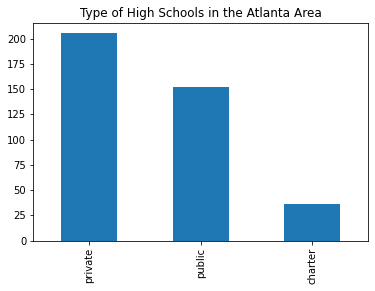

In [25]:
zipcode_schools_df['type'].value_counts().plot(kind='bar')
plt.title("Type of High Schools in the Atlanta Area")
plt.show()

In [53]:
rating_sort = cleaned_zipcode_df['rating'].sort_values(ascending=False)
rating_sort



186     9
272     9
156     9
119     9
273     8
       ..
170     2
336    10
296     1
367     1
142     1
Name: rating, Length: 94, dtype: object

In [55]:
rating = cleaned_zipcode_df['rating'].unique()
#rating

In [56]:
fig = px.pie(round(zipcode_schools_df['rating'].value_counts(),0), names=rating, title='School Ratings')
fig.show()


In [60]:
#'zip', 'name', 'school-summary','type', 'level-codes', 'level', 'street', 'city', 'state', 'phone',  'county', 'lat', 'lon', 'district-name', 'district-id', 'rating', 'year', 'rating-description'

df = zipcode_schools_df[['zip', 'name', 'school-summary','type', 
                         'level-codes', 'level', 'street', 'city', 
                         'state', 'phone',  'county', 'lat', 'lon', 
                         'district-name', 'district-id', 'rating']]
df.head()

,zip,name,school-summary,type,level-codes,level,street,city,state,phone,county,lat,lon,district-name,district-id,rating
0,30303,Department Of Human Resources,"Department Of Human Resources, a public school...",public,"p,e,m,h","PK,KG,1,2,3,4,5,6,7,8,9,10,11,12",2 Peachtree Street Northwest,Atlanta,GA,(404) 657-0435,Fulton County,33.753963,-84.390221,Department Of Human Resources,206,None
1,30303,Graduation Achievement Center Charter High School,Graduation Achievement Center Charter High Sch...,charter,h,"9,10,11,12",235 Peachtree St NW,Atlanta,GA,(844) 776-8678,Fulton,33.760502,-84.387169,State Charter Schools Provost Academy Georgia,250,None
2,30303,Wellspring Living,"Wellspring Living, a public school located in ...",public,"m,h","8,9,11",100 Edgewood Avenue Southeast,Atlanta,GA,(678) 246-9998,Fulton County,33.754742,-84.385574,Fulton County School District,73,None
3,30303,The Life School of Atlanta,"The Life School of Atlanta, a private school l...",private,h,"9,10,11,12",190 Pryor Street Southwest,Atlanta,GA,(404) 343-0064,Fulton County,33.749504,-84.392090,None,0,None
4,30370,Longview School,"Longview School, a private school located in D...",private,h,"9,10,11,12",PO BOX 369,Deerfield,NH,(603) 463-7854,ROCKINGHAM,43.193851,-71.572395,None,0,None


<AxesSubplot:>

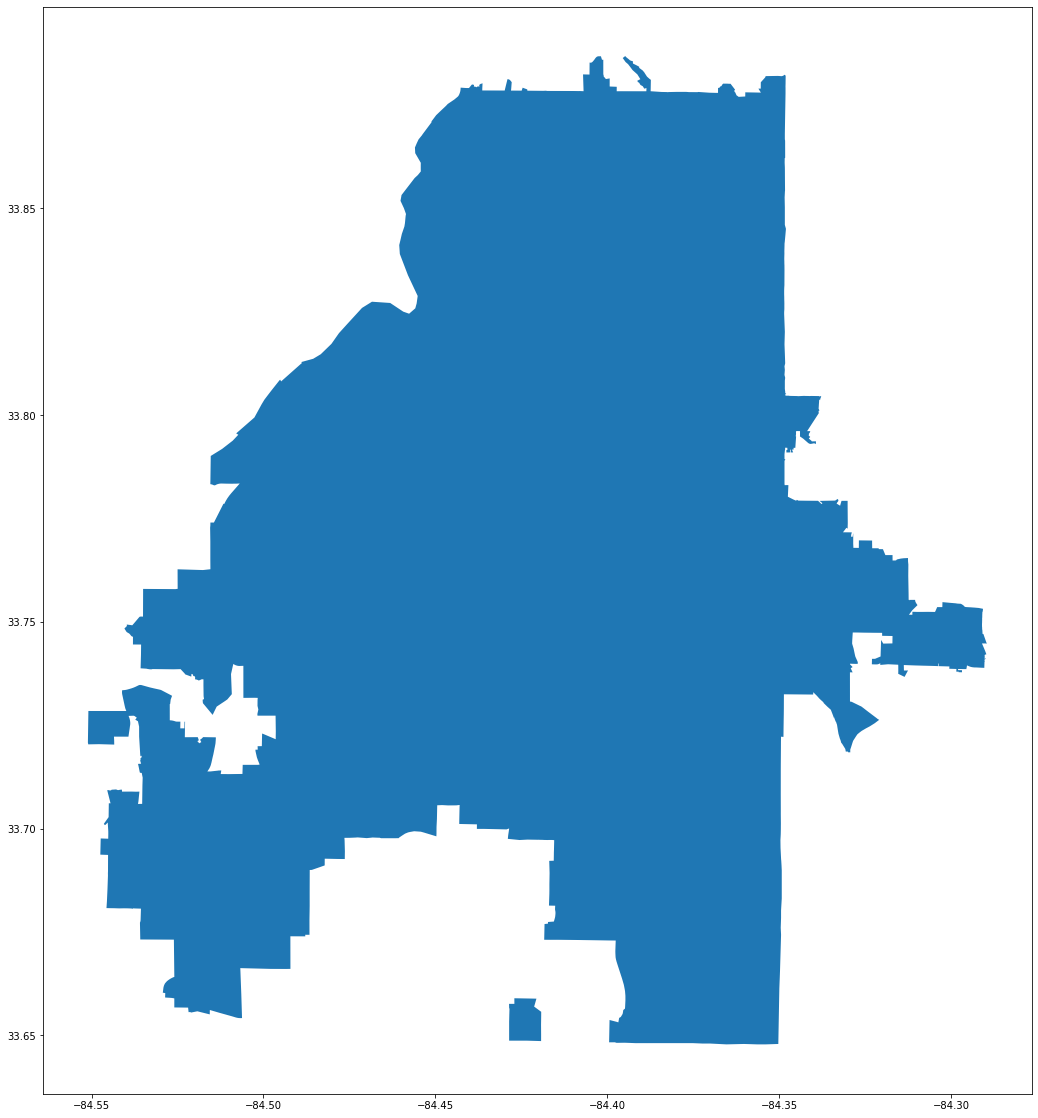

In [68]:
schools_zip_map = gpd.read_file('mygeodata/border_level8_polygon.shp')
schools_zip_map.to_crs(epsg=4326).plot(figsize=(20, 20))
